In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

PATH_TO_DATA = '../data/'
PATH_TO_OUTPUT_DATA = '../output-data/'
PATH_TO_MODEL_DATA = '../model-data/'

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
MLB_DF = pd.read_csv(PATH_TO_OUTPUT_DATA + 'MLB_INPUT.csv')

In [11]:
features = MLB_DF.drop(labels = 
                       ['dt', 'Y', 'M', 'D', 'away_team', 
                        'home_team', 'away_pitcher_id', 'home_pitcher_id',
                       'date'],
                      axis = 1)

In [33]:
features

,outcome,home_AVG,home_OBP,home_SLG,away_AVG,away_OBP,away_SLG,AVG_difference,OBP_difference,SLG_difference,...,away_p_FIP,FIP_difference,FIP_difference_PCT,home_ELO,away_ELO,ELO_difference,E[ELO],home_rest,away_rest,rest_difference
0,1,0.273459,0.339283,0.466387,0.281519,0.349386,0.443116,-8.059871,-10.103320,23.270676,...,4.922466,-0.331278,-7.215517,1496.828252,1462.450742,34.377511,0.597675,5,5,0
1,1,0.290176,0.357486,0.448264,0.267825,0.353322,0.450778,22.351406,4.164662,-2.514311,...,3.814248,1.471418,27.837901,1487.470945,1529.964302,-42.493357,0.380077,5,5,0
2,1,0.276079,0.359380,0.468525,0.251828,0.327088,0.398252,24.251065,32.291929,70.272995,...,5.100444,-0.648884,-14.576562,1544.173611,1478.296302,65.877309,0.681015,5,5,0
3,1,0.254198,0.336984,0.426431,0.243537,0.322708,0.400071,10.660336,14.276221,26.359450,...,5.357483,-1.391845,-35.097642,1527.653270,1509.946671,17.706599,0.550788,5,5,0
4,0,0.272199,0.341041,0.443798,0.268227,0.342770,0.423582,3.971909,-1.728942,20.216091,...,3.469976,1.107246,24.190357,1544.192550,1512.406489,31.786061,0.590480,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46123,1,0.256098,0.336957,0.443089,0.237903,0.325000,0.395161,18.194335,11.956522,47.928141,...,3.407274,0.144028,4.055630,1539.697126,1535.818786,3.878340,0.511161,1,1,0
46124,1,0.230496,0.306709,0.421986,0.233202,0.331034,0.430830,-2.705127,-24.325218,-8.844224,...,3.831486,2.921044,43.258506,1485.521165,1554.316475,-68.795310,0.311732,1,1,0
46125,1,0.218868,0.316832,0.373585,0.210970,0.280769,0.354430,7.897460,36.062452,19.154526,...,4.390192,0.000000,0.000000,1525.656785,1443.713781,81.943004,0.719787,1,1,0
46126,0,0.196653,0.267176,0.334728,0.245059,0.345890,0.501976,-48.406569,-78.714838,-167.248251,...,2.592247,1.797945,40.953670,1465.726121,1567.938914,-102.212794,0.235634,1,1,0


### Brief EDA

In [101]:
features['E[ELO]']

0        0.597675
1        0.380077
2        0.681015
3        0.550788
4        0.590480
           ...   
46123    0.511161
46124    0.311732
46125    0.719787
46126    0.235634
46127    0.310808
Name: E[ELO], Length: 46128, dtype: float64

In [100]:
import numpy as np
np.corrcoef([1 if x > .5 else 0 for x in features['E[ELO]']], features['outcome'])

array([[1.        , 0.08780784],
       [0.08780784, 1.        ]])

Thank you: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

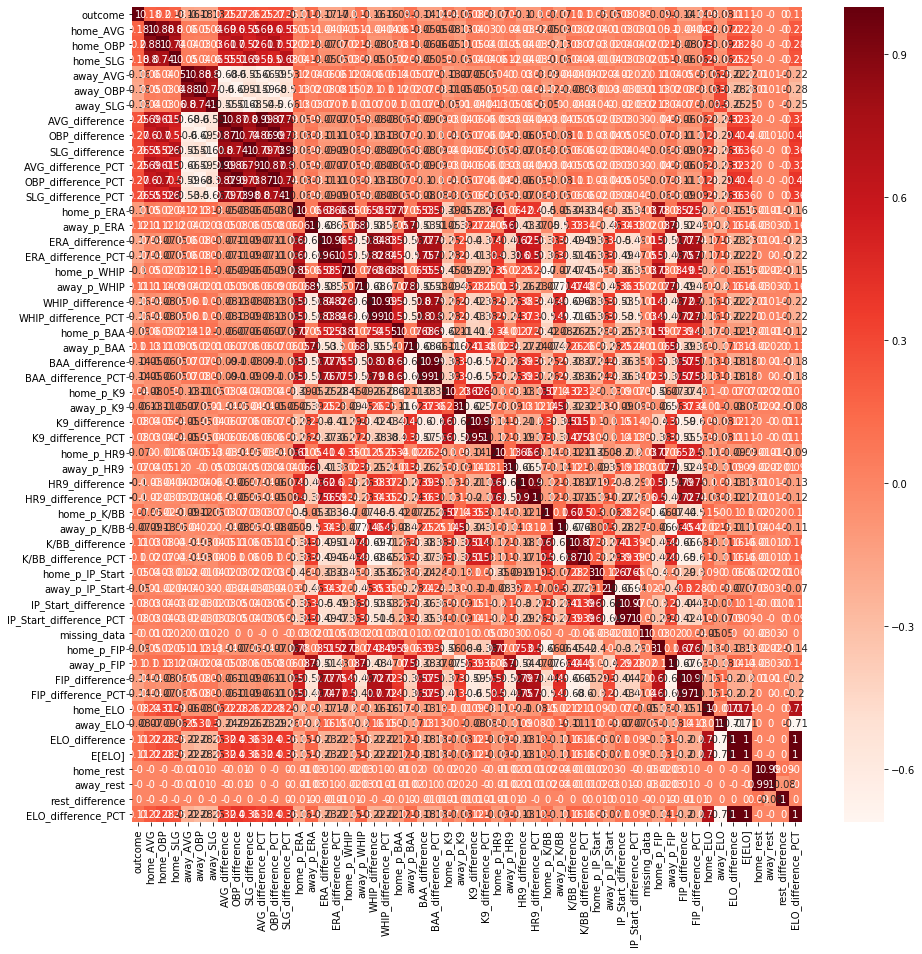

In [119]:
# correlation plots
plt.figure(figsize=(15,15))
cor = features.corr()
cor = cor.apply(lambda x: round(100*x)/100)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [127]:
#Correlation with output variable
cor_target = abs(cor['outcome'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target >= 0.3]
relevant_features

outcome    1.0
Name: outcome, dtype: float64

### SEPARATING DATA
Looking at PCT differences only

In [34]:
features['rest_difference'] = features['home_rest'] - features['away_rest']

In [63]:
features['ELO_difference_PCT'] = features['ELO_difference']/features['home_ELO']*100

In [102]:
PCT_DIFF = features[[i for i in list(features) if 'PCT' in i] + ['E[ELO]', 'rest_difference', 'outcome']]
PCT_DIFF_features = [i for i in list(features) if 'PCT' in i] + ['E[ELO]', 'rest_difference']

# REMOVING E[ELO] BEACUSE OF CORRELATION
PCT_DIFF = features[[i for i in list(features) if 'PCT' in i] + ['rest_difference', 'outcome']]
PCT_DIFF_features = [i for i in list(features) if 'PCT' in i] + ['rest_difference']

In [103]:
DIFF = features[[i for i in list(features) if (('difference' in i) & ('PCT' not in i))] + [
    'E[ELO]', 'outcome']]
DIFF_features = [i for i in list(features) if (('difference' in i) & ('PCT' not in i))] + [
    'E[ELO]']

In [105]:
# PCT DIFF
x1_train, x1_test, y1_train, y1_test = train_test_split(
    PCT_DIFF[PCT_DIFF_features], PCT_DIFF['outcome'], test_size = 0.2, random_state = 499
)

In [106]:
# DIFF
x2_train, x2_test, y2_train, y2_test = train_test_split(
    DIFF[DIFF_features], DIFF['outcome'], test_size = 0.2, random_state = 499
)

In [107]:
x2_train.describe()

,AVG_difference,OBP_difference,SLG_difference,ERA_difference,WHIP_difference,BAA_difference,K9_difference,HR9_difference,K/BB_difference,IP_Start_difference,FIP_difference,ELO_difference,rest_difference,E[ELO]
count,36902.000000,36902.000000,36902.000000,36902.000000,36902.000000,36902.000000,36902.000000,36902.000000,36902.000000,36902.000000,36902.000000,36902.000000,36902.000000,36902.000000
mean,1.160181,2.268792,2.366647,-0.012033,-0.002197,-0.000125,0.008690,-0.000956,0.016350,0.007428,-0.007984,0.054554,0.005176,0.500280
std,42.543584,46.087607,86.092328,1.232017,0.223668,0.034479,2.046158,0.438054,1.491997,0.731426,0.965899,47.091523,2.497672,0.126908
min,-164.641395,-174.070240,-374.873190,-5.400000,-0.962967,-0.151000,-9.049055,-2.087705,-13.656118,-5.551671,-4.613252,-176.250866,-182.000000,0.116175
25%,-26.769364,-28.262339,-53.739755,-0.790000,-0.144314,-0.022000,-1.315681,-0.275524,-0.715640,-0.410129,-0.613996,-31.666956,0.000000,0.409851
50%,0.982479,2.064271,2.190028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.547910,0.000000,0.501577
75%,29.100094,32.701229,58.540264,0.770000,0.140452,0.022000,1.304191,0.272135,0.734261,0.418646,0.599874,32.123743,0.000000,0.591420
max,182.095440,196.036498,330.407801,5.630000,1.021626,0.160000,9.527812,2.113534,13.910173,5.703297,4.302672,193.658080,189.000000,0.902874


In [108]:
x2_test.describe()

,AVG_difference,OBP_difference,SLG_difference,ERA_difference,WHIP_difference,BAA_difference,K9_difference,HR9_difference,K/BB_difference,IP_Start_difference,FIP_difference,ELO_difference,rest_difference,E[ELO]
count,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000
mean,1.447789,2.225630,2.422321,0.031366,0.006398,0.000297,-0.005776,0.006868,-0.039556,-0.021325,0.026386,-0.783147,-0.019185,0.497924
std,42.674185,46.434960,87.636766,1.221929,0.224222,0.034469,2.058778,0.431078,1.484112,0.727229,0.955632,47.175521,1.842221,0.127261
min,-157.251980,-177.993311,-405.340760,-4.750000,-0.957816,-0.135000,-8.495736,-1.981001,-12.966667,-5.666667,-3.906858,-176.250866,-175.000000,0.116175
25%,-25.757345,-28.421288,-55.148905,-0.740000,-0.139721,-0.022000,-1.334829,-0.257423,-0.769053,-0.436537,-0.582170,-32.855465,0.000000,0.406546
50%,1.263223,1.980373,2.732842,0.000000,0.000000,0.000000,0.000000,0.000000,-0.002741,0.000000,0.000000,-0.747681,0.000000,0.497848
75%,29.122720,32.753217,59.091970,0.810000,0.149444,0.022372,1.318348,0.274642,0.698253,0.403183,0.635890,31.279419,0.000000,0.589069
max,162.071120,188.748137,317.577710,4.940000,0.927708,0.132000,8.662627,2.303085,12.452381,4.357143,4.478704,176.391970,4.000000,0.883992


# PCT_DIFF models

#### Logistic regression

```
>>> from sklearn.model_selection import cross_val_score
>>> clf = svm.SVC(kernel='linear', C=1)
>>> scores = cross_val_score(clf, X, y, cv=5)
```

In [109]:
# imports
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression as LogisticRegression

In [110]:
# data: x1_train, x1_test, y1_train, y1_test
logit = LogisticRegression(random_state = 499)

In [111]:
logit.fit(x1_train, y1_train)
logit.score(x1_train, y1_train)

0.6366321608584901

In [112]:
scores = cross_val_score(logit, x1_train, y1_train, cv=5)
print("Accuracy: %0.3f (+/- %0.3f)" % (
    scores.mean(), scores.std() * 2))

Accuracy: 0.637 (+/- 0.002)


In [113]:
sum(logit.predict(x1_test) == y1_test)/len(y1_test)

0.6354866681118578